In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | saint-pierre
Processing Record 3 of Set 1 | ahuimanu
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | plettenberg bay
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | toliary
City not found. Skipping...
Processing Record 8 of Set 1 | alotau
City not found. Skipping...
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | juneau
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | phan rang
City not found. Skipping...
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | llandrindod wells
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | goderich
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | eureka
Processing Re

Processing Record 37 of Set 4 | virginia beach
Processing Record 38 of Set 4 | kungurtug
Processing Record 39 of Set 4 | belaya gora
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | bang yai
Processing Record 44 of Set 4 | nioro
Processing Record 45 of Set 4 | coihaique
Processing Record 46 of Set 4 | miyako
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | port-gentil
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | valparaiso
Processing Record 1 of Set 5 | samana
Processing Record 2 of Set 5 | maneadero
Processing Record 3 of Set 5 | honningsvag
Processing Record 4 of Set 5 | santo domingo
Processing Record 5 of Set 5 | goreloye
Processing Record 6 of Set 5 | kahului
Processing Record 7 of Set 5 | saint-louis
Processing Record 8 of Set 5 | ketchikan
Processing R

Processing Record 27 of Set 8 | jacareacanga
Processing Record 28 of Set 8 | yerbogachen
Processing Record 29 of Set 8 | codrington
Processing Record 30 of Set 8 | elizabeth city
Processing Record 31 of Set 8 | ilanskiy
Processing Record 32 of Set 8 | raudeberg
Processing Record 33 of Set 8 | blenheim
Processing Record 34 of Set 8 | providencia
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | eregli
Processing Record 37 of Set 8 | nampula
Processing Record 38 of Set 8 | katobu
Processing Record 39 of Set 8 | shebalino
Processing Record 40 of Set 8 | kindu
Processing Record 41 of Set 8 | helong
Processing Record 42 of Set 8 | san patricio
Processing Record 43 of Set 8 | port-cartier
Processing Record 44 of Set 8 | sain alto
Processing Record 45 of Set 8 | santa fe
Processing Record 46 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 47 of Set 8 | vila velha
Processing Record 48 of Set 8 | akyab
Processing Record 49 of Set 8 

Processing Record 9 of Set 12 | gama
Processing Record 10 of Set 12 | guerrero
Processing Record 11 of Set 12 | nianzishan
Processing Record 12 of Set 12 | ulaanbaatar
Processing Record 13 of Set 12 | belmonte
Processing Record 14 of Set 12 | xiaoshi
Processing Record 15 of Set 12 | aklavik
Processing Record 16 of Set 12 | gloversville
Processing Record 17 of Set 12 | portland
Processing Record 18 of Set 12 | copiapo
Processing Record 19 of Set 12 | gorontalo
Processing Record 20 of Set 12 | xuddur
Processing Record 21 of Set 12 | gamba
Processing Record 22 of Set 12 | manzanillo
Processing Record 23 of Set 12 | bauska
Processing Record 24 of Set 12 | bukama
Processing Record 25 of Set 12 | bilma
Processing Record 26 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 27 of Set 12 | omboue
Processing Record 28 of Set 12 | faya
Processing Record 29 of Set 12 | nurota
Processing Record 30 of Set 12 | pirogovskiy
Processing Record 31 of Set 12 | kaili
Processing Record

In [11]:
len(city_data)

562

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.40,77,25,16.58,PF,2022-02-04 23:49:38
1,Saint-Pierre,-21.3393,55.4781,80.24,83,75,3.44,RE,2022-02-05 00:00:10
2,Ahuimanu,21.4447,-157.8378,80.78,58,1,3.00,US,2022-02-05 00:00:13
3,Albany,42.6001,-73.9662,21.67,86,100,5.10,US,2022-02-04 23:59:42
4,Plettenberg Bay,-34.0527,23.3716,62.96,77,78,7.05,ZA,2022-02-05 00:00:15
5,Bluff,-46.6000,168.3333,58.80,57,90,5.57,NZ,2022-02-05 00:00:15
6,Tuktoyaktuk,69.4541,-133.0374,-20.85,95,19,13.76,CA,2022-02-05 00:00:16
7,Juneau,58.3019,-134.4197,36.84,95,100,5.99,US,2022-02-05 00:00:18
8,Talnakh,69.4865,88.3972,1.20,97,98,6.13,RU,2022-02-04 23:53:49
9,Bambous Virieux,-20.3428,57.7575,79.21,94,75,11.50,MU,2022-02-04 23:53:46


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-02-04 23:49:38,-9.8000,-139.0333,78.40,77,25,16.58
1,Saint-Pierre,RE,2022-02-05 00:00:10,-21.3393,55.4781,80.24,83,75,3.44
2,Ahuimanu,US,2022-02-05 00:00:13,21.4447,-157.8378,80.78,58,1,3.00
3,Albany,US,2022-02-04 23:59:42,42.6001,-73.9662,21.67,86,100,5.10
4,Plettenberg Bay,ZA,2022-02-05 00:00:15,-34.0527,23.3716,62.96,77,78,7.05
5,Bluff,NZ,2022-02-05 00:00:15,-46.6000,168.3333,58.80,57,90,5.57
6,Tuktoyaktuk,CA,2022-02-05 00:00:16,69.4541,-133.0374,-20.85,95,19,13.76
7,Juneau,US,2022-02-05 00:00:18,58.3019,-134.4197,36.84,95,100,5.99
8,Talnakh,RU,2022-02-04 23:53:49,69.4865,88.3972,1.20,97,98,6.13
9,Bambous Virieux,MU,2022-02-04 23:53:46,-20.3428,57.7575,79.21,94,75,11.50


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

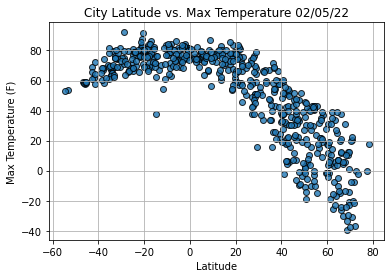

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

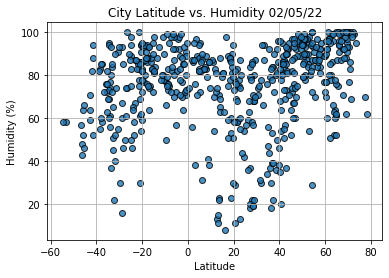

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

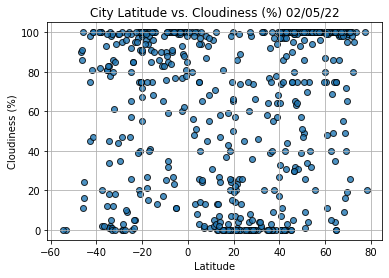

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

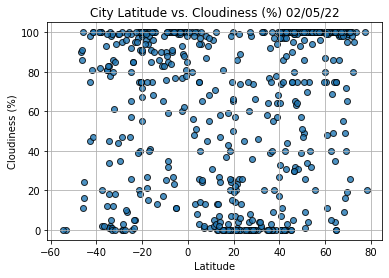

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()